# Quadractic

Test how gradient descent diverges and converges on non-convex landscape.

Landscape is given by 

$$
f(x) = x^2. 
$$
gradient is
$$
f'(x) = 2x
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

visualize the function

In [2]:
def lossf(x,delta,wl):
    return x**2

Fisrt test divergence and convergence over standard quadratic functions

In [3]:
def gradf(x,delta,wl):
    return 2*x

In [4]:
def GD(x0, lr, steps, delta, wl):
    x_traj = np.zeros(steps+1)
    x_traj[0] = x0
    loss_traj = - np.ones(steps+1)
    loss_traj[0] = lossf(x0,delta,wl)
    for i in range(steps):
        x_traj[i+1] = x0 - lr * gradf(x0,delta,wl)
        x0 = x_traj[i+1]
        loss_traj[i+1] = lossf(x0,delta,wl)
        if loss_traj[i+1] > 1e+8:
            loss_traj[i+1] = -1
            break
    return loss_traj, x_traj

Do a scan in $s \in (0,2)$ (s is the learning rate).

$nn = 10$. We first select $2^{nn}+1$ grid points in $(0,2)$. And then record the convergence (use $-1$) or divergence (use $+1$).

In [5]:
nn = 16
s_span = np.linspace(0,1.5,2**nn+1)
results = - np.ones(2**nn+1) # 0 must be -1

for i in range(2**nn):
    # 0 already known
    s = s_span[i+1]
    loss_traj, _ = GD(1.0, s, 1000, .2, .1)
    if loss_traj[-1] == -1:
        results[i+1] = 1

In [6]:
numB = np.zeros(nn+1)
for ni in range(nn+1):
    nidx = np.arange(2**ni+1) * 2**(nn-ni)
    nresult = results[nidx]
    numB[ni] = np.sum((nresult[:-1] != nresult[1:]).astype(float))

In [7]:
slope, cut = np.linalg.lstsq(np.vstack([np.arange(nn+1), np.ones(nn+1)]).T , np.log2(numB), rcond=None)[0]

(0.0, 0.05500000000000001)

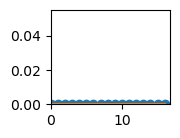

In [8]:
plt.figure(figsize=(3.375/2, 3.375/8*3), constrained_layout=True)
plt.plot(range(nn+1), np.log2(numB),'o')
plt.plot(np.arange(nn+1), slope * np.arange(nn+1) + cut)
plt.xlim(0,)
plt.ylim(0,)
#plt.xlabel('logN')
#plt.ylabel('log#B')
plt.savefig('./figures/rationcheck.pdf')